In [6]:
import pandas as pd

In [7]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [8]:
nyc.columns = ['Date', 'Temperature', 'Anomoly']

In [9]:
nyc.head(5)

,Date,Temperature,Anomoly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [11]:
X_train.shape

(93, 1)

In [12]:
X_test.shape

(31, 1)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [15]:
linear_regression.coef_

array([0.01939167])

In [16]:
linear_regression.intercept_

-0.30779820252657686

In [18]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [19]:
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [20]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [21]:
predict(2019)

array([38.84399018])

In [22]:
predict(1890)

array([36.34246432])

In [23]:
predict(2023)

array([38.92155687])

In [24]:
import seaborn as sns

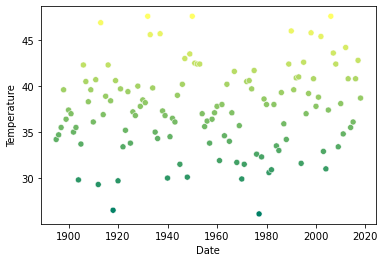

In [25]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='summer', legend=False)

In [26]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [27]:
import numpy as np

In [28]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

In [29]:
import matplotlib.pyplot as plt

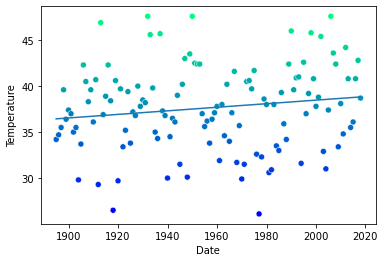

In [31]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
line = plt.plot(x,y)